# KMeans and KNN Demonstration



In [1]:
import math
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import time

from mpl_toolkits.mplot3d import Axes3D

## - File Handling

In [2]:
# parse input file and returns number of lines and array with file data
def filein (fname):
    numlines=0
    xin=[]
    f=open(fname,'r')
    for line in f:
        #print (line, end='')
        xin.append(line)
        numlines=numlines+1
    f.close()
    return xin,numlines

In [3]:

def getxn(fname):
    data,numlines=filein(fname)
    dataline=['0' for i in range(numlines)]
    for i in range(numlines):
        x=data[i]
        y=x.split('\t')
        y[-1]=y[-1].replace('\n','')
        dataline[i]=y
    #print ('\n\nascii-input',dataline)
    xdata=dataline[:]
    for i in range (numlines):
        inline=len(dataline[i])
        for j in range (inline):
            if xdata[i][j] != '':
                xdata[i][j]=eval(xdata[i][j])
            else:
                xdata[i][j]=None
    #print ('dataline',dataline)
    #print ('xdata',xdata)
    return xdata, numlines

In [4]:
def fileout (filename,filedata):
    f2=open(filename,'w')
    f2.write(filedata)
    f2.close()

In [5]:
def outmake(x):
    outstring=''
    personso=len(x)
    timeslotso=len(x[0])
    for i in range (personso):
        for j in range (timeslotso):
            outstring=outstring + str(x[i][j]) + '\t'
        outstring=outstring+'\n'
    outstring=outstring[0:-1]
    return outstring

In [6]:
intest=input('Do you want to INPUT data to a file (y/n), Def.=n ')
intest=intest.lower()
# if intest.find('n') == -1:
if intest == 'y':
    filename=input ('Please give me filename, e.g. input.txt         ')
    print ('\nfilename=   ',filename)
    filein (filename)
    print ('\nfile read')
c,numc=getxn(filename)
print ('\nnumber= ',numc,'\ndata= \n',c)

Do you want to INPUT data to a file (y/n), Def.=n y
Please give me filename, e.g. input.txt         data3.txt

filename=    data3.txt

file read

number=  441 
data= 
 [[-10.0, -10.0, -0.06737946999085467], [-10.0, -9.0, -0.16572675401761255], [-10.0, -8.0, -0.33373269960326085], [-10.0, -7.0, -0.5502322005640732], [-10.0, -6.0, -0.7427357821433482], [-10.0, -5.0, -0.8208499862390648], [-10.0, -4.0, -0.7427357821438524], [-10.0, -3.0, -0.5502322005668835], [-10.0, -2.0, -0.33373269961585966], [-10.0, -1.0, -0.1657267540638415], [-10.0, 0.0, -0.06737947012973411], [-10.0, 1.0, -0.022428677536446333], [-10.0, 2.0, -0.006112528299170085], [-10.0, 3.0, -0.0013638903989332074], [-10.0, 4.0, -0.0002491616282075799], [-10.0, 5.0, -3.726822361870933e-05], [-10.0, 6.0, -4.5650572604518735e-06], [-10.0, 7.0, -4.586679900379561e-07], [-10.0, 8.0, -3.8244542022096485e-08], [-10.0, 9.0, -2.865603406223592e-09], [-10.0, 10.0, -2.7775887729928043e-10], [-9.0, -10.0, -0.16572675401761255], [-9.0, -9.0

In [7]:
nx=int(np.sqrt(numc))
ny=int(np.sqrt(numc))
x=np.zeros((nx,ny))
y=np.zeros((nx,ny))
z=np.zeros((nx,ny))
xa=np.array(x)
ya=np.array(y)
za=np.array(z)

ca=np.array(c)
num=0

In [8]:
for iout in range(nx):
    for jout in range(ny):
        xa[iout][jout]=c[num][0]
        ya[iout][jout]=c[num][1]
        za[iout][jout]=c[num][2]
        num=num+1

### Randomize given data and prompt what % of data to use in test

In [9]:
np.random.shuffle(ca)
dataPercentage = input("percent of data used?")
dataPercentage = float(dataPercentage)
if dataPercentage <= 1 and dataPercentage > 0:
#     print(ca)
#     print(dataPercentage)
    amountRemaining = (ca.size/3) - (ca.size/3) * dataPercentage
    amountRemaining = round(amountRemaining)
    print(amountRemaining)
    ca = ca[amountRemaining:]
#     print(ca)

percent of data used?0.5
220


## KMeans Section

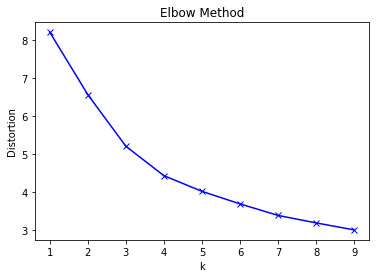

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

#finds distortions by trying different amount of k values
distortions = []
K = range(1,10)
for k in K:
        kmean = KMeans (n_clusters = k)
        kmean.fit(ca)
        distortions.append(sum(np.min(cdist(ca, kmean.cluster_centers_, 'euclidean'), axis = 1)) / ca.shape[0])

# graph labels
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()        

Define k:4


<IPython.core.display.Javascript object>


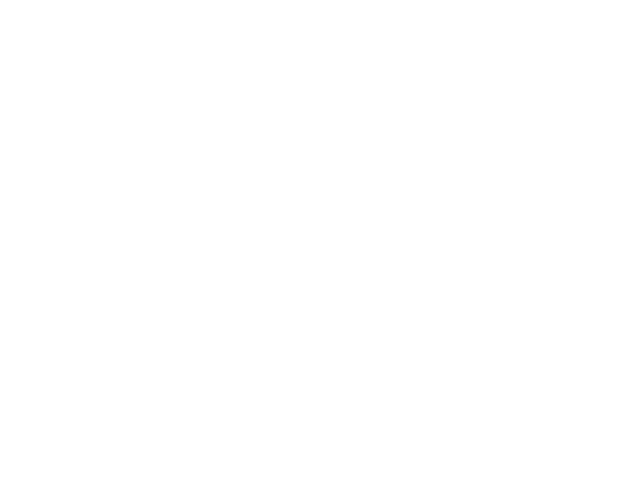

In [11]:
# Prompt user to select k value based on the graph above
# and creates a 3d kmeans graph
clusters = int(input('Define k:'))

%matplotlib notebook
fig = plt.figure()
kmeans = KMeans(n_clusters = clusters) # Method to initializing defaults to init = k-means++
ax = Axes3D(fig)
kmeans.fit(ca)
y_kmeans = kmeans.predict(ca)

ax.scatter(ca[:,0], ca[:,1], ca[:,2], c = y_kmeans, edgecolor = 'k')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c = 'black', s = 200, alpha = 0.5)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [12]:

from numpy import array
temp = array(list(zip(y_kmeans, ca[:,0], ca[:,1], ca[:,2])))
print(temp)
np.random.shuffle(temp)
print(temp)

XP = temp[:,[1,2,3]]
y = temp[:, [0]]
y = y.ravel()
# dataclass = test[:,:1]
# samplePoints = np.delete(test,[0],1)
# print(dataclass)

[[ 0.00000000e+00  2.00000000e+00 -5.00000000e+00 -7.46504130e-02]
 [ 1.00000000e+00 -6.00000000e+00  1.00000000e+00 -2.47246489e-01]
 [ 0.00000000e+00  1.00000000e+01 -3.00000000e+00 -1.36389040e-03]
 [ 2.00000000e+00  8.00000000e+00  1.00000000e+00 -8.20849999e-01]
 [ 1.00000000e+00 -5.00000000e+00  0.00000000e+00 -8.20887253e-01]
 [ 3.00000000e+00 -4.00000000e+00 -1.00000000e+01 -7.42735782e-01]
 [ 0.00000000e+00  6.00000000e+00 -1.00000000e+01 -4.56505726e-06]
 [ 3.00000000e+00 -7.00000000e+00 -4.00000000e+00 -6.06530660e+00]
 [ 1.00000000e+00 -4.00000000e+00  3.00000000e+00 -1.70690756e-02]
 [ 2.00000000e+00  5.00000000e+00  3.00000000e+00 -6.70320121e+00]
 [ 0.00000000e+00  5.00000000e+00 -9.00000000e+00 -9.16916262e-05]
 [ 3.00000000e+00 -1.00000000e+00 -2.00000000e+00 -8.22884670e-01]
 [ 3.00000000e+00 -8.00000000e+00 -3.00000000e+00 -2.72531793e+00]
 [ 1.00000000e+00 -7.00000000e+00  1.00000000e+00 -1.83157514e-01]
 [ 2.00000000e+00  9.00000000e+00  8.00000000e+00 -8.20849986e

## KNN Section

In [13]:
import sklearn

from sklearn.model_selection import train_test_split, cross_validate
from sklearn import preprocessing, neighbors

In [14]:
# Sets up two groups, test and train, for knn
X = preprocessing.scale(XP)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) #random_state parameter for seeded random state


In [15]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_expect = y_test
y_pred = clf.predict(X_test)

print(classification_report(y_expect,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      1.00      1.00        18
         2.0       1.00      1.00      1.00        15
         3.0       1.00      0.94      0.97        18

   micro avg       0.99      0.99      0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67



In [17]:
error_rate = []

for i in range(1, 40):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

<IPython.core.display.Javascript object>


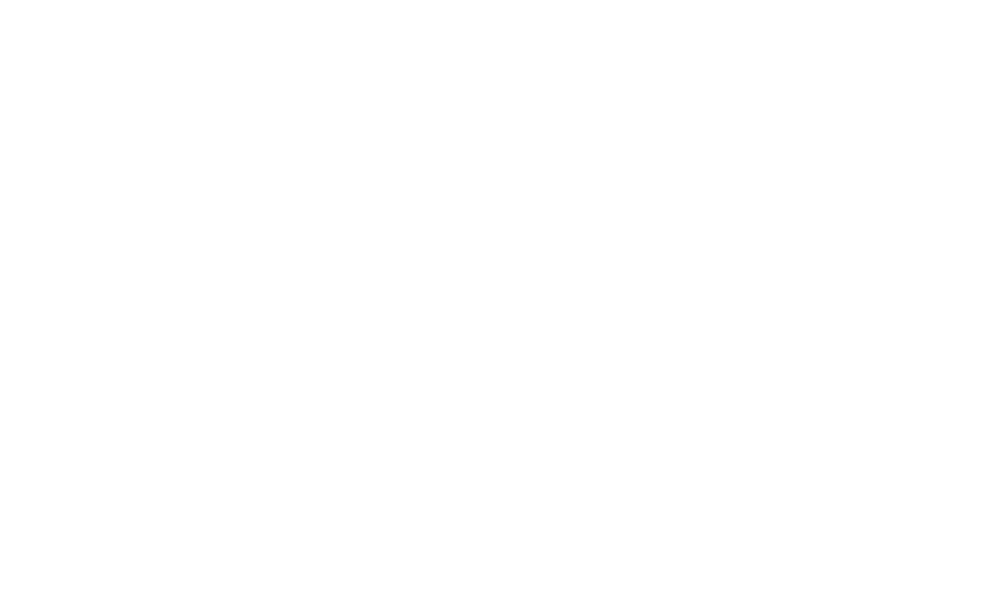

Text(0, 0.5, 'Error Rate')

In [18]:
# elbow graph for knn

plt.figure(figsize = (10, 6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# When K = 2
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

print('With K=2\n')
print(classification_report(y_test, predict))

With K=2

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        16
         1.0       1.00      0.94      0.97        18
         2.0       1.00      0.93      0.97        15
         3.0       1.00      0.89      0.94        18

   micro avg       0.94      0.94      0.94        67
   macro avg       0.95      0.94      0.94        67
weighted avg       0.95      0.94      0.94        67



<IPython.core.display.Javascript object>


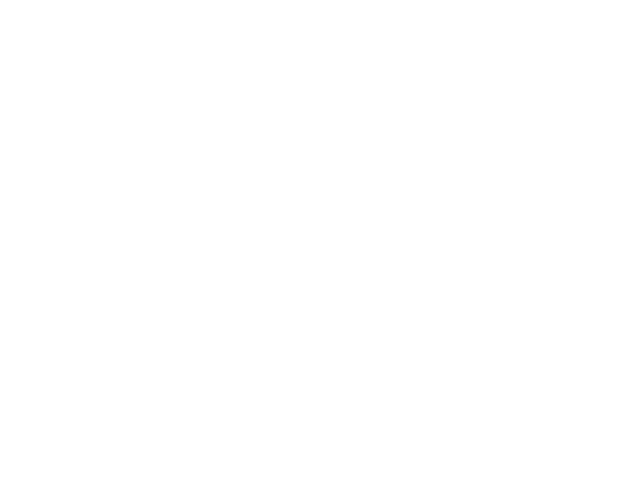

In [20]:
# training set graph
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


<IPython.core.display.Javascript object>


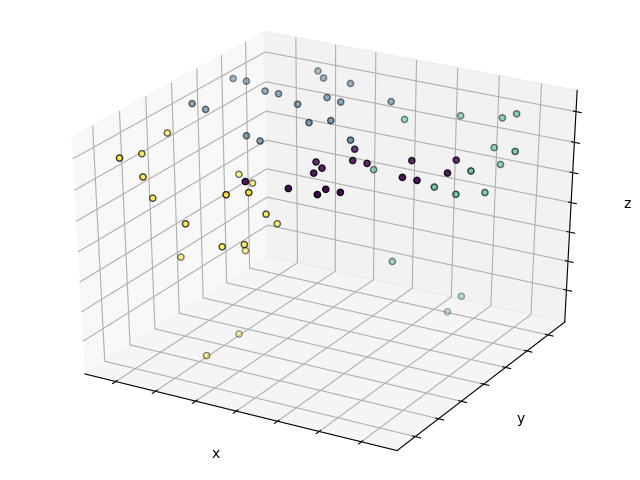

In [21]:
# testing set graph
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c = y_test, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()